In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
%pwd

'C:\\Users\\matin\\Documents\\Data Analysis\\Project 1\\Homelessness-Group-Project'

In [37]:
homeless_data = ("Homeless Population by State.csv")
weather_data = ("weather.csv")

homeless_data=pd.read_csv(homeless_data)
weather_data=pd.read_csv(weather_data)

homeless_weather=pd.merge(homeless_data, weather_data, how="outer", on=["State"])
homeless_weather.head()

,State,Total,Per10kResidents,ChronicallyHomeless,PeopleInFamilyUnits,SoloIndividuals,UnaccompaniedYouths,Veterans,Unnamed: 0,Average Temp (F)
0,Alabama,3752,7.4,539,1270,2482,169,308,0.0,63.755000
1,Alaska,2320,31.7,576,560,1760,186,134,1.0,30.352143
2,Arizona,13553,18.6,2476,2846,10707,917,857,2.0,59.975949
3,Arkansas,2459,8.1,376,328,2131,251,92,3.0,61.046835
4,California,171521,43.7,57760,25538,145983,9590,10395,4.0,59.257534


In [38]:
data = {
    "State":homeless_weather["State"],
    "Total":homeless_weather["Total"],
    "Per10kResidents":homeless_weather["Per10kResidents"],
    "Average Temp (F)":homeless_weather["Average Temp (F)"]
}
homeless_weather_df = pd.DataFrame(data)
homeless_weather_df

,State,Total,Per10kResidents,Average Temp (F)
0,Alabama,3752,7.4,63.755000
1,Alaska,2320,31.7,30.352143
2,Arizona,13553,18.6,59.975949
3,Arkansas,2459,8.1,61.046835
4,California,171521,43.7,59.257534
5,Colorado,10397,17.9,44.388583
6,Connecticut,2930,8.1,51.733333
7,Delaware,2369,23.6,57.180000
8,District of Columbia,4410,65.8,NaN
9,Florida,25959,11.9,73.956818


In [39]:
homeless_weather_df = homeless_weather_df.dropna()

<function matplotlib.pyplot.show(close=None, block=None)>

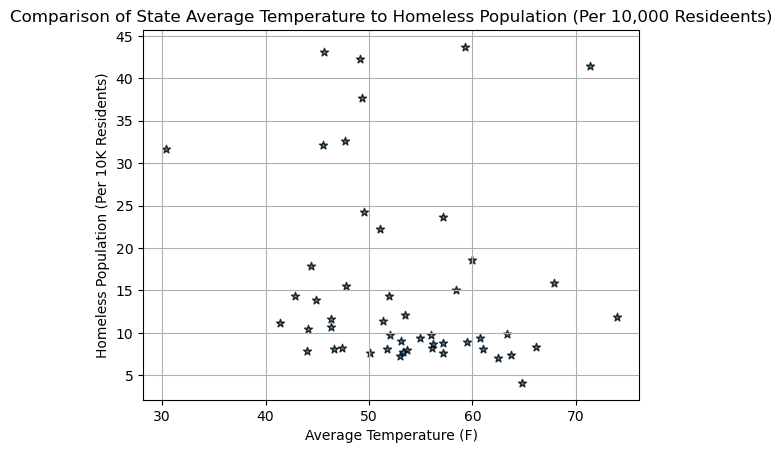

In [40]:
plt.scatter(
    homeless_weather_df["Average Temp (F)"],
    homeless_weather_df["Per10kResidents"],
    edgecolor="black",
    linewidths=1,
    marker="*",
    alpha=0.8
)

plt.title("Comparison of State Average Temperature to Homeless Population (Per 10,000 Resideents)")
plt.xlabel("Average Temperature (F)")
plt.ylabel("Homeless Population (Per 10K Residents)")
plt.grid(True)
plt.show

In [43]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, sterr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="black")
    plt.xlabel("Average Temperature (F)")
    plt.ylabel(title)
    print(f"The r² value is: {rvalue**2}")
    print(f"The r value is: {rvalue}")
    print(f"The p value is: {pvalue}")
    plt.grid(True)
    plt.show()

The r² value is: 0.029395602334835614
The r value is: -0.1714514576631987
The p value is: 0.23384166330533207


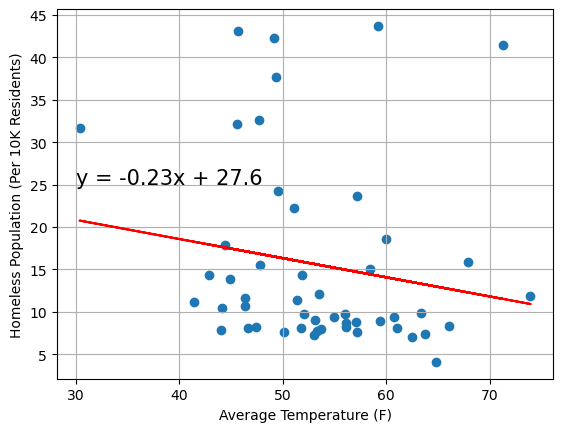

In [44]:
x_values = homeless_weather_df["Average Temp (F)"]
y_values = homeless_weather_df["Per10kResidents"]
plot_linear_regression(x_values, y_values, "Homeless Population (Per 10K Residents)", (30,25))